# Load Packages and Data

In [1]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import json
import os
import csv
# from PIL import Image, ImageDraw
from shapely.geometry import Polygon
from shapely.geometry import mapping, shape

In [2]:
# load metadata as dataframe
#df = pd.read_csv("HuBMAP-20-dataset_information.csv")
df = pd.read_csv("Metadata Figure all 30.csv")
print(df)
print()
print("Number of records:", len(df))
#print()
#print("Column names:", df.columns)

    Kaggle_ID               VU_ID        HuBMAP_ID         Donor_ID  \
0   00a67c839      VAN0032-RK-5-6  HBM627.RSGW.898  HBM226.XVDP.877   
1   0486052bb      VAN0011-RK-8-2  HBM783.GJWP.694  HBM368.WSHR.356   
2   0749c6ccc      VAN0032-RK-4-5  HBM227.THVC.544  HBM226.XVDP.877   
3   095bf7a1f   VAN0012-RK-103-75  HBM874.RZDW.757  HBM679.GXQW.326   
4   1e2425f28  VAN0008-RK-403-100  HBM783.GDKK.879  HBM522.WZBV.379   
5   1eb18739d  VAN0010-LK-152-162  HBM649.DLZF.463  HBM322.KQBK.747   
6   26dc41664   VAN0013-LK-202-96  HBM849.XMPC.398  HBM455.HLHM.985   
7   2ec3f1bb9    VAN0010-LK-160-2  HBM833.DBGG.252  HBM322.KQBK.747   
8   2f6ecfcdf    VAN0014-LK-207-2  HBM276.PGFS.693  HBM769.HVDR.369   
9   3589adb90    VAN0013-LK-206-2  HBM623.RPMC.638  HBM455.HLHM.985   
10  4ef6695ce   VAN0016-LK-202-89  HBM264.XSVF.528  HBM687.KPKM.763   
11  5274ef79a     VAN0031-LK-2-58  HBM673.JJRZ.435  HBM633.KPHW.963   
12  54f2eec69     VAN0006-LK-2-85  HBM725.PDDC.788  HBM525.JNPV.685   
13  57

# Perform basic analysis

In [3]:
# categorical data
categorical_fields = ["Donor_ID", "Race", "Sex", "Tissue_Preservation_Method"]
for column in categorical_fields:
    s=df[column]
    print(str(column))
    print("Categories:", s.unique())
    print("Frequency of each category:")
    print(s.value_counts())
    print("Most common category:")
    print(s.mode())
    print()

Donor_ID
Categories: ['HBM226.XVDP.877' 'HBM368.WSHR.356' 'HBM679.GXQW.326' 'HBM522.WZBV.379'
 'HBM322.KQBK.747' 'HBM455.HLHM.985' 'HBM769.HVDR.369' 'HBM687.KPKM.763'
 'HBM633.KPHW.963' 'HBM525.JNPV.685' 'HBM429.BVWN.357' 'HBM485.HTBW.247'
 'HBM938.LVRS.434' 'HBM547.NCQL.874' 'HBM745.MDSR.597' 'HBM758.JRSC.348']
Frequency of each category:
HBM485.HTBW.247    4
HBM938.LVRS.434    3
HBM322.KQBK.747    3
HBM525.JNPV.685    3
HBM687.KPKM.763    2
HBM455.HLHM.985    2
HBM226.XVDP.877    2
HBM745.MDSR.597    2
HBM769.HVDR.369    2
HBM758.JRSC.348    1
HBM679.GXQW.326    1
HBM368.WSHR.356    1
HBM633.KPHW.963    1
HBM522.WZBV.379    1
HBM429.BVWN.357    1
HBM547.NCQL.874    1
Name: Donor_ID, dtype: int64
Most common category:
0    HBM485.HTBW.247
dtype: object

Race
Categories: ['White' 'Black or African American']
Frequency of each category:
White                        25
Black or African American     5
Name: Race, dtype: int64
Most common category:
0    White
dtype: object

Sex
Categories:

Average Age: 59.3
Range of Age: 46
Minimum Age: 31
Maximum Age: 77

Average Weight_kg: 85.9
Range of Weight_kg: 72.5
Minimum Weight_kg: 59.0
Maximum Weight_kg: 131.5

Average Height_cm: 170.35
Range of Height_cm: 35.6
Minimum Height_cm: 157.4
Maximum Height_cm: 193.0

Average BMI: 29.61
Range of BMI: 15.5
Minimum BMI: 22.0
Maximum BMI: 37.5

Average Number_of_Glomeruli: 236.73
Range of Number_of_Glomeruli: 535
Minimum Number_of_Glomeruli: 51
Maximum Number_of_Glomeruli: 586



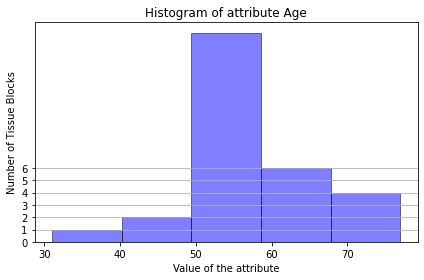

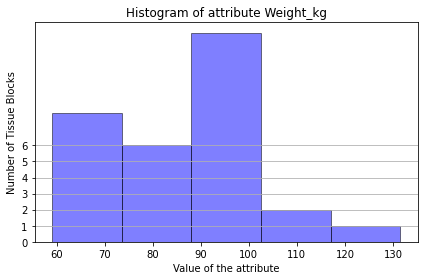

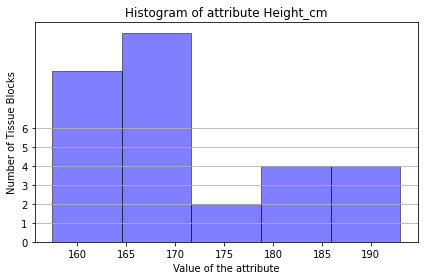

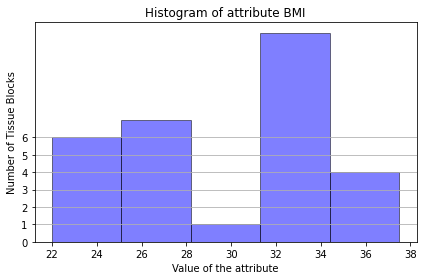

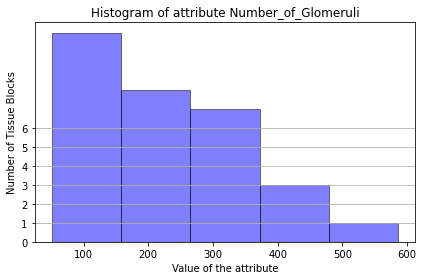

In [4]:
# continuous values
continuous_fields = ["Age", "Weight_kg", "Height_cm", "BMI", "Number_of_Glomeruli"]
for column in continuous_fields:
    s = df[column]
    print("Average", str(column)+":", np.around(s.mean(), decimals = 2))
    field_range = s.max() - s.min()
    print("Range of", str(column)+":", np.around(field_range, decimals = 2))
    print("Minimum", str(column)+":", s.min())
    print("Maximum", str(column)+":", s.max())
    print()
    fig = plt.figure()
    sp = fig.add_subplot(1, 1, 1)
    title_string = "Histogram of attribute " + str(column)
    sp.set_title(title_string)
    sp.set_xlabel("Value of the attribute")
    sp.set_ylabel("Number of Tissue Blocks")
    sp.hist(s, bins=5, color = "blue", edgecolor = "black", alpha = 0.5)
    sp.set_yticks(np.arange(0, 7, 1.0))
    sp.grid(axis='y')
    fig.tight_layout()
    plt.savefig(column+"_hist.png")
    fig

# Differences between sexes

In [5]:
# create separate dataframes for each sex
df_male = df[df['Sex']=="Male"]
df_male.shape

(15, 15)

In [6]:
df_female = df[df['Sex']=="Female"]
df_female.shape

(15, 15)

In [7]:
# look at similar simple analysis separated by sex
# categorical data
categorical_fields = ["Race", "Tissue_Preservation_Method"] 
for column in categorical_fields:
    s_male=df_male[column]
    s_female=df_female[column]
    print(str(column))
    print("Males")
    print("Frequency of each category:")
    print(s_male.value_counts())
    print("Most common category:")
    print(s_male.mode())
    print("Females")
    print("Frequency of each category:")
    print(s_female.value_counts())
    print("Most common category:")
    print(s_female.mode())
    print()
# continuous values
continuous_fields = ["Age", "Weight_kg", "Height_cm", "BMI", "Number_of_Glomeruli"] 
for column in continuous_fields:
    s_male=df_male[column]
    s_female=df_female[column]
    print("Males")
    print("Average", str(column)+":", np.around(s_male.mean(), decimals = 2))
    male_range = s_male.max() - s_male.min()
    print("Range of", str(column)+":", np.around(male_range, decimals = 2))
    print("Minimum", str(column)+":", s_male.min())
    print("Maximum", str(column)+":", s_male.max())
    print("Females")
    print("Average", str(column)+":", np.around(s_female.mean(), decimals = 2))
    female_range = s_female.max() - s_female.min()
    print("Range of", str(column)+":", np.around(female_range, decimals = 2))
    print("Minimum", str(column)+":", s_female.min())
    print("Maximum", str(column)+":", s_female.max())
    print()

Race
Males
Frequency of each category:
White                        10
Black or African American     5
Name: Race, dtype: int64
Most common category:
0    White
dtype: object
Females
Frequency of each category:
White    15
Name: Race, dtype: int64
Most common category:
0    White
dtype: object

Tissue_Preservation_Method
Males
Frequency of each category:
Fresh Frozen    8
FFPE            7
Name: Tissue_Preservation_Method, dtype: int64
Most common category:
0    Fresh Frozen
dtype: object
Females
Frequency of each category:
Fresh Frozen    8
FFPE            7
Name: Tissue_Preservation_Method, dtype: int64
Most common category:
0    Fresh Frozen
dtype: object

Males
Average Age: 55.53
Range of Age: 35
Minimum Age: 31
Maximum Age: 66
Females
Average Age: 63.07
Range of Age: 33
Minimum Age: 44
Maximum Age: 77

Males
Average Weight_kg: 92.65
Range of Weight_kg: 58.5
Minimum Weight_kg: 73.0
Maximum Weight_kg: 131.5
Females
Average Weight_kg: 79.15
Range of Weight_kg: 34.0
Minimum Weight_kg:

# Calculating average glomerulus size
Now I want to calculate average glomerulus area per sample for the training dataset.

In [8]:
os.listdir("Path to All 30 Kaggle glom annotations JSON")

['00a67c839.json',
 '0486052bb.json',
 '0749c6ccc.json',
 '095bf7a1f.json',
 '1e2425f28.json',
 '1eb18739d.json',
 '26dc41664.json',
 '2ec3f1bb9.json',
 '2f6ecfcdf.json',
 '3589adb90.json',
 '4ef6695ce.json',
 '5274ef79a.json',
 '54f2eec69.json',
 '57512b7f1.json',
 '5d8b53a68.json',
 '8242609fa.json',
 '9e81e2693.json',
 'a14e495cf.json',
 'aa05346ff.json',
 'aaa6a05cc.json',
 'afa5e8098.json',
 'b2dc8411c.json',
 'b9a3865fc.json',
 'bacb03928.json',
 'c68fe75ea.json',
 'cb2d976f4.json',
 'd488c759a.json',
 'e464d2f6c.json',
 'e79de561c.json',
 'ff339c0b2.json']

In [9]:
# glom_mask_filenames = ['0486052bb.json','b9a3865fc.json','26dc41664.json','e79de561c.json','aaa6a05cc.json','8242609fa.json','4ef6695ce.json','54f2eec69.json','cb2d976f4.json','1e2425f28.json','afa5e8098.json','b2dc8411c.json','c68fe75ea.json','095bf7a1f.json','2f6ecfcdf.json']
glom_mask_filenames = os.listdir("Path to All 30 Kaggle glom annotations jsons")
glom_mask_filenames
len(glom_mask_filenames)

30

In [10]:
shapes = [(28672, 30400), # 00a67c839
          (34937, 25784), # 0486052bb
          (26624, 30368), # 0749c6ccc
          (39000, 38160), # 095bf7a1f
          (32220, 26780), # 1e2425f28
          (33103, 20329), # 1eb18739d
          (42360, 38160), # 26dc41664
          (47723, 23990), # 2ec3f1bb9
          (25794, 31278), # 2f6ecfcdf
          (22165, 29433), # 3589adb90
          (50680, 39960), # 4ef6695ce
          (18491, 22134), # 5274ef79a
          (22240, 30440), # 54f2eec69
          (43160, 33240), # 57512b7f1
          (36732, 22153), # 5d8b53a68
          (44066, 31299), # 8242609fa
          (33100, 27642), # 9e81e2693
          (32768, 62688), # a14e495cf
          (47340, 30720), # aa05346ff
          (13013, 18484), # aaa6a05cc
          (43780, 36800), # afa5e8098
          (31262, 14844), # b2dc8411c
          (40429, 31295), # b9a3865fc
          (22163, 23968), # bacb03928
          (49780, 26840), # c68fe75ea
          (49548, 34940), # cb2d976f4
          (29020, 46660), # d488c759a
          (40816, 50560), # e464d2f6c
          (27020, 16180), # e79de561c
          (38912, 48544), # ff339c0b2
         ]

In [11]:
average_area_per_sample = []
for file in glom_mask_filenames:
    json_filepath = "Path to All 30 Kaggle glom annotations jsons/"+file
    jsonFile = open(json_filepath, 'r')
    data = json.load(jsonFile)
    jsonFile.close()
    polys = []
    for i in range(len(data)):   
        polys.append(Polygon(data[i]['geometry']['coordinates'][0]))
    areas = []
    for j in range(len(polys)):
        areas.append(polys[j].area)
    average_area = sum(areas)/len(areas)
    average_area_per_sample.append(average_area)

In [12]:
print("Glomeruli mask file names and their average area per glom. in pixels.")
for k in range(len(glom_mask_filenames)):
    print(glom_mask_filenames[k]+",", np.around(average_area_per_sample[k], decimals = 1))

Glomeruli mask file names and their average area per glom. in pixels.
00a67c839.json, 91439.1
0486052bb.json, 73324.9
0749c6ccc.json, 91714.6
095bf7a1f.json, 99419.7
1e2425f28.json, 104856.9
1eb18739d.json, 65541.0
26dc41664.json, 105764.1
2ec3f1bb9.json, 56534.5
2f6ecfcdf.json, 49820.4
3589adb90.json, 55473.1
4ef6695ce.json, 101620.0
5274ef79a.json, 47564.3
54f2eec69.json, 101859.9
57512b7f1.json, 97407.5
5d8b53a68.json, 58700.4
8242609fa.json, 55201.8
9e81e2693.json, 102675.5
a14e495cf.json, 83785.7
aa05346ff.json, 116611.7
aaa6a05cc.json, 43340.4
afa5e8098.json, 113046.7
b2dc8411c.json, 44230.1
b9a3865fc.json, 56322.1
bacb03928.json, 56384.2
c68fe75ea.json, 110656.9
cb2d976f4.json, 78814.3
d488c759a.json, 83864.0
e464d2f6c.json, 91096.3
e79de561c.json, 88100.6
ff339c0b2.json, 90088.0


In [13]:
# calculate average, range, min, and max glom areas across the training dataset in pixels
s_avg_glom_area = pd.Series(average_area_per_sample)
print("Average:", np.around(s_avg_glom_area.mean(), decimals = 2))
avg_glom_area_in_pixel = s_avg_glom_area.mean()
avg_glom_size_range = s_avg_glom_area.max() - s_avg_glom_area.min()
print("Range:", np.around(avg_glom_size_range, decimals = 2))
print("Minimum:", np.around(s_avg_glom_area.min(), decimals = 2))
print("Maximum:", np.around(s_avg_glom_area.max(), decimals = 2))


Average: 80508.63
Range: 73271.23
Minimum: 43340.43
Maximum: 116611.65


# Visualizations
Now, let's create some visualizations to inspect these average areas in regards to the clinical metadata.

In [14]:
#df_train = df[df.glomerulus_segmentation_file.isin(glom_mask_filenames)]
#df_train = df_train.sort_values(by=['glomerulus_segmentation_file'])
#df_train['Avg_glom_area'] = average_area_per_sample
#print(df_train)
# check if there are multiple tissue blocks from the same patient in the training dataset
#s=df_train["patient_number"]
#print("patient_number")
#print("Categories:", s.unique())
#print("Frequency of each category:")
#print(s.value_counts())
#print("Most common category:")
#print(s.mode())
#print()
df = df.sort_values(by=['Kaggle_ID'])
df['Avg_glom_area_pixels'] = average_area_per_sample
df

,Kaggle_ID,VU_ID,HuBMAP_ID,Donor_ID,Kaggle_dataset,Tissue_Preservation_Method,Width_pixels,Height_pixels,Race,Sex,Weight_kg,Height_cm,BMI,Age,Number_of_Glomeruli,Avg_glom_area_pixels
0,00a67c839,VAN0032-RK-5-6,HBM627.RSGW.898,HBM226.XVDP.877,private test,FFPE,28672,30400,White,Male,96.6,175.3,31.4,66,97,91439.101719
1,0486052bb,VAN0011-RK-8-2,HBM783.GJWP.694,HBM368.WSHR.356,public test,FFPE,34937,25784,White,Male,106.1,180.3,32.6,31,130,73324.935169
2,0749c6ccc,VAN0032-RK-4-5,HBM227.THVC.544,HBM226.XVDP.877,private test,FFPE,26624,30368,White,Male,96.6,175.3,31.4,66,109,91714.586935
3,095bf7a1f,VAN0012-RK-103-75,HBM874.RZDW.757,HBM679.GXQW.326,public train,Fresh Frozen,39000,38160,White,Female,71.7,160.0,28.0,44,350,99419.674540
4,1e2425f28,VAN0008-RK-403-100,HBM783.GDKK.879,HBM522.WZBV.379,public test,Fresh Frozen,32220,26780,White,Male,131.5,193.0,35.3,48,178,104856.940638
5,1eb18739d,VAN0010-LK-152-162,HBM649.DLZF.463,HBM322.KQBK.747,private test,Fresh Frozen,33103,20329,White,Male,91.2,167.6,32.5,56,157,65541.000170
6,26dc41664,VAN0013-LK-202-96,HBM849.XMPC.398,HBM455.HLHM.985,public train,Fresh Frozen,42360,38160,White,Female,71.3,167.6,25.4,66,245,105764.121345
7,2ec3f1bb9,VAN0010-LK-160-2,HBM833.DBGG.252,HBM322.KQBK.747,public test,FFPE,47723,23990,White,Male,91.2,167.6,32.5,56,399,56534.467545
8,2f6ecfcdf,VAN0014-LK-207-2,HBM276.PGFS.693,HBM769.HVDR.369,public train,FFPE,25794,31278,White,Female,93.0,157.4,37.5,76,160,49820.443773
9,3589adb90,VAN0013-LK-206-2,HBM623.RPMC.638,HBM455.HLHM.985,public test,FFPE,22165,29433,White,Female,71.3,167.6,25.4,66,239,55473.050397


In [15]:
df.to_csv("Metadata all 30 with avg glom.csv", index=False)

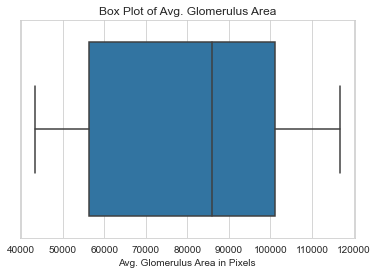

In [16]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x=df["Avg_glom_area_pixels"])
ax.set_title("Box Plot of Avg. Glomerulus Area")
ax.set(xlabel='Avg. Glomerulus Area in Pixels')
plt.savefig("Box Plot of Avg. Glomerulus Area.png")

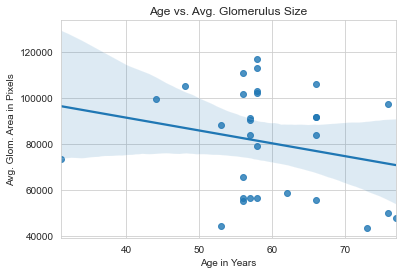

In [17]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1 = sns.regplot(x="Age", y="Avg_glom_area_pixels", data=df)
ax1.set_title("Age vs. Avg. Glomerulus Size")
ax1.set(xlabel='Age in Years', ylabel='Avg. Glom. Area in Pixels')
plt.savefig("Age vs. Avg. Glomerulus Size.png")

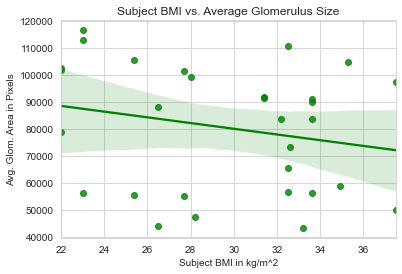

In [18]:
ax2 = sns.regplot(x="BMI", y="Avg_glom_area_pixels", data=df, color='g')
ax2.set_title("Subject BMI vs. Average Glomerulus Size")
ax2.set(xlabel='Subject BMI in kg/m^2', ylabel='Avg. Glom. Area in Pixels')
plt.savefig("Subject BMI vs. Average Glomerulus Size.png")

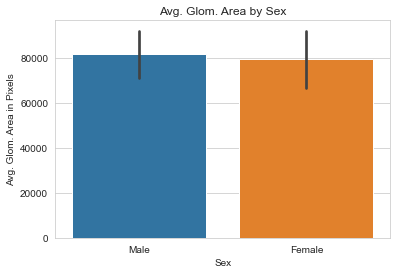

In [19]:
ax4 = sns.barplot(x='Sex', y='Avg_glom_area_pixels', data=df)
ax4.set_title("Avg. Glom. Area by Sex")
ax4.set(xlabel='Sex', ylabel="Avg. Glom. Area in Pixels")
plt.savefig("Avg. Glom. Area by Sex.png")

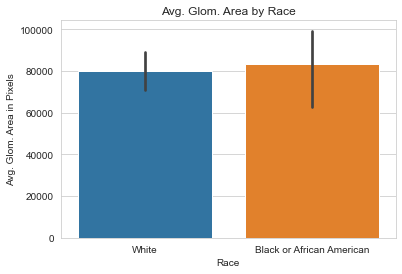

In [20]:
ax5 = sns.barplot(x='Race', y='Avg_glom_area_pixels', data=df)
ax5.set_title("Avg. Glom. Area by Race")
ax5.set(xlabel='Race', ylabel="Avg. Glom. Area in Pixels")
plt.savefig("Avg. Glom. Area by Race.png")

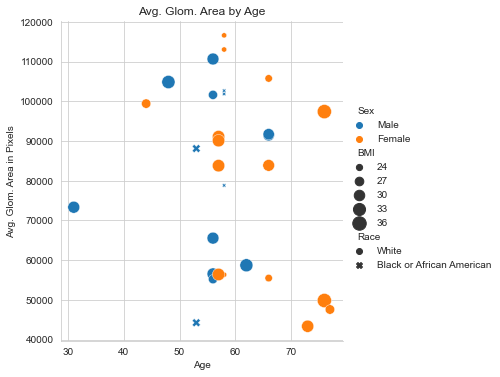

In [21]:
ax7 = sns.relplot(x='Age', y='Avg_glom_area_pixels', data=df, hue="Sex", style="Race", size="BMI", sizes=(15, 200))
ax7.set(title="Avg. Glom. Area by Age", xlabel='Age', ylabel="Avg. Glom. Area in Pixels")
plt.savefig("Avg. Glom. Area by Age.png")

In [22]:
# calculate glom density

# read in AR masks
AR_mask_filenames = os.listdir("Path to All 30 Kaggle AR annotations jsons")
AR_mask_filenames
len(AR_mask_filenames)


30

In [23]:
cortex_area = []
for file in AR_mask_filenames:
    json_filepath = "Path to All 30 Kaggle AR annotations jsons/"+file
    jsonFile = open(json_filepath, 'r')
    data = json.load(jsonFile)
    jsonFile.close()
    polys = []
    #print(data[i])
    for i in range(len(data)):
        if data[i]['properties']['classification']['name'].lower() == 'cortex':
            polys.append(Polygon(data[i]['geometry']['coordinates'][0]))
    areas = []
    for j in range(len(polys)):
        print(file, len(polys))
        areas.append(polys[j].area)
    if len(areas) == 2:
        print("adding areas")
        cortex_area.append(sum(areas))
    else:
        cortex_area.append(polys[j].area)
len(cortex_area)

00a67c839-anatomical-structure.json 1
0486052bb-anatomical-structure.json 1
0749c6ccc-anatomical-structure.json 1
095bf7a1f-anatomical-structure.json 1
1e2425f28-anatomical-structure.json 1
1eb18739d-anatomical-structure.json 1
26dc41664-anatomical-structure.json 1
2ec3f1bb9-anatomical-structure.json 1
2f6ecfcdf-anatomical-structure.json 1
3589adb90-anatomical-structure.json 1
4ef6695ce-anatomical-structure.json 1
5274ef79a-anatomical-structure.json 2
5274ef79a-anatomical-structure.json 2
adding areas
54f2eec69-anatomical-structure.json 1
57512b7f1-anatomical-structure.json 1
5d8b53a68-anatomical-structure.json 1
8242609fa-anatomical-structure.json 1
9e81e2693-anatomical-structure.json 1
a14e495cf-anatomical-structure.json 1
aa05346ff-anatomical-structure.json 1
aaa6a05cc-anatomical-structure.json 1
afa5e8098-anatomical-structure.json 1
b2dc8411c-anatomical-structure.json 2
b2dc8411c-anatomical-structure.json 2
adding areas
b9a3865fc-anatomical-structure.json 1
bacb03928-anatomical-str

30

In [24]:
df['approximate_total_cortex_area_pixels'] = cortex_area
df

,Kaggle_ID,VU_ID,HuBMAP_ID,Donor_ID,Kaggle_dataset,Tissue_Preservation_Method,Width_pixels,Height_pixels,Race,Sex,Weight_kg,Height_cm,BMI,Age,Number_of_Glomeruli,Avg_glom_area_pixels,approximate_total_cortex_area_pixels
0,00a67c839,VAN0032-RK-5-6,HBM627.RSGW.898,HBM226.XVDP.877,private test,FFPE,28672,30400,White,Male,96.6,175.3,31.4,66,97,91439.101719,3.353474e+08
1,0486052bb,VAN0011-RK-8-2,HBM783.GJWP.694,HBM368.WSHR.356,public test,FFPE,34937,25784,White,Male,106.1,180.3,32.6,31,130,73324.935169,2.072450e+08
2,0749c6ccc,VAN0032-RK-4-5,HBM227.THVC.544,HBM226.XVDP.877,private test,FFPE,26624,30368,White,Male,96.6,175.3,31.4,66,109,91714.586935,2.808833e+08
3,095bf7a1f,VAN0012-RK-103-75,HBM874.RZDW.757,HBM679.GXQW.326,public train,Fresh Frozen,39000,38160,White,Female,71.7,160.0,28.0,44,350,99419.674540,5.848311e+08
4,1e2425f28,VAN0008-RK-403-100,HBM783.GDKK.879,HBM522.WZBV.379,public test,Fresh Frozen,32220,26780,White,Male,131.5,193.0,35.3,48,178,104856.940638,3.762089e+08
5,1eb18739d,VAN0010-LK-152-162,HBM649.DLZF.463,HBM322.KQBK.747,private test,Fresh Frozen,33103,20329,White,Male,91.2,167.6,32.5,56,157,65541.000170,2.520475e+08
6,26dc41664,VAN0013-LK-202-96,HBM849.XMPC.398,HBM455.HLHM.985,public train,Fresh Frozen,42360,38160,White,Female,71.3,167.6,25.4,66,245,105764.121345,3.818911e+08
7,2ec3f1bb9,VAN0010-LK-160-2,HBM833.DBGG.252,HBM322.KQBK.747,public test,FFPE,47723,23990,White,Male,91.2,167.6,32.5,56,399,56534.467545,5.590336e+08
8,2f6ecfcdf,VAN0014-LK-207-2,HBM276.PGFS.693,HBM769.HVDR.369,public train,FFPE,25794,31278,White,Female,93.0,157.4,37.5,76,160,49820.443773,1.958177e+08
9,3589adb90,VAN0013-LK-206-2,HBM623.RPMC.638,HBM455.HLHM.985,public test,FFPE,22165,29433,White,Female,71.3,167.6,25.4,66,239,55473.050397,1.938087e+08


In [25]:
# convert pixels to square micron

In [26]:
print("Glomeruli mask file names and their average area per glom. in square micron.")
for k in range(len(glom_mask_filenames)):
    print(glom_mask_filenames[k]+",", np.around(average_area_per_sample[k]/4, decimals = 1))

Glomeruli mask file names and their average area per glom. in square micron.
00a67c839.json, 22859.8
0486052bb.json, 18331.2
0749c6ccc.json, 22928.6
095bf7a1f.json, 24854.9
1e2425f28.json, 26214.2
1eb18739d.json, 16385.3
26dc41664.json, 26441.0
2ec3f1bb9.json, 14133.6
2f6ecfcdf.json, 12455.1
3589adb90.json, 13868.3
4ef6695ce.json, 25405.0
5274ef79a.json, 11891.1
54f2eec69.json, 25465.0
57512b7f1.json, 24351.9
5d8b53a68.json, 14675.1
8242609fa.json, 13800.5
9e81e2693.json, 25668.9
a14e495cf.json, 20946.4
aa05346ff.json, 29152.9
aaa6a05cc.json, 10835.1
afa5e8098.json, 28261.7
b2dc8411c.json, 11057.5
b9a3865fc.json, 14080.5
bacb03928.json, 14096.1
c68fe75ea.json, 27664.2
cb2d976f4.json, 19703.6
d488c759a.json, 20966.0
e464d2f6c.json, 22774.1
e79de561c.json, 22025.2
ff339c0b2.json, 22522.0


In [27]:
print("Avg. glom area in pixels", avg_glom_area_in_pixel)
print("Avg. glom area in square micron", avg_glom_area_in_pixel/4)


Avg. glom area in pixels 80508.62626614828
Avg. glom area in square micron 20127.15656653707


In [28]:
df['approximate_cortex_area_sq_microns'] = df['approximate_total_cortex_area_pixels']/4
df

,Kaggle_ID,VU_ID,HuBMAP_ID,Donor_ID,Kaggle_dataset,Tissue_Preservation_Method,Width_pixels,Height_pixels,Race,Sex,Weight_kg,Height_cm,BMI,Age,Number_of_Glomeruli,Avg_glom_area_pixels,approximate_total_cortex_area_pixels,approximate_cortex_area_sq_microns
0,00a67c839,VAN0032-RK-5-6,HBM627.RSGW.898,HBM226.XVDP.877,private test,FFPE,28672,30400,White,Male,96.6,175.3,31.4,66,97,91439.101719,3.353474e+08,8.383684e+07
1,0486052bb,VAN0011-RK-8-2,HBM783.GJWP.694,HBM368.WSHR.356,public test,FFPE,34937,25784,White,Male,106.1,180.3,32.6,31,130,73324.935169,2.072450e+08,5.181125e+07
2,0749c6ccc,VAN0032-RK-4-5,HBM227.THVC.544,HBM226.XVDP.877,private test,FFPE,26624,30368,White,Male,96.6,175.3,31.4,66,109,91714.586935,2.808833e+08,7.022082e+07
3,095bf7a1f,VAN0012-RK-103-75,HBM874.RZDW.757,HBM679.GXQW.326,public train,Fresh Frozen,39000,38160,White,Female,71.7,160.0,28.0,44,350,99419.674540,5.848311e+08,1.462078e+08
4,1e2425f28,VAN0008-RK-403-100,HBM783.GDKK.879,HBM522.WZBV.379,public test,Fresh Frozen,32220,26780,White,Male,131.5,193.0,35.3,48,178,104856.940638,3.762089e+08,9.405223e+07
5,1eb18739d,VAN0010-LK-152-162,HBM649.DLZF.463,HBM322.KQBK.747,private test,Fresh Frozen,33103,20329,White,Male,91.2,167.6,32.5,56,157,65541.000170,2.520475e+08,6.301187e+07
6,26dc41664,VAN0013-LK-202-96,HBM849.XMPC.398,HBM455.HLHM.985,public train,Fresh Frozen,42360,38160,White,Female,71.3,167.6,25.4,66,245,105764.121345,3.818911e+08,9.547277e+07
7,2ec3f1bb9,VAN0010-LK-160-2,HBM833.DBGG.252,HBM322.KQBK.747,public test,FFPE,47723,23990,White,Male,91.2,167.6,32.5,56,399,56534.467545,5.590336e+08,1.397584e+08
8,2f6ecfcdf,VAN0014-LK-207-2,HBM276.PGFS.693,HBM769.HVDR.369,public train,FFPE,25794,31278,White,Female,93.0,157.4,37.5,76,160,49820.443773,1.958177e+08,4.895443e+07
9,3589adb90,VAN0013-LK-206-2,HBM623.RPMC.638,HBM455.HLHM.985,public test,FFPE,22165,29433,White,Female,71.3,167.6,25.4,66,239,55473.050397,1.938087e+08,4.845217e+07


In [29]:
# calc # gloms per square micron

df['num_glom_per_square_micron'] = df['Number_of_Glomeruli']/df['approximate_cortex_area_sq_microns']
df

,Kaggle_ID,VU_ID,HuBMAP_ID,Donor_ID,Kaggle_dataset,Tissue_Preservation_Method,Width_pixels,Height_pixels,Race,Sex,Weight_kg,Height_cm,BMI,Age,Number_of_Glomeruli,Avg_glom_area_pixels,approximate_total_cortex_area_pixels,approximate_cortex_area_sq_microns,num_glom_per_square_micron
0,00a67c839,VAN0032-RK-5-6,HBM627.RSGW.898,HBM226.XVDP.877,private test,FFPE,28672,30400,White,Male,96.6,175.3,31.4,66,97,91439.101719,3.353474e+08,8.383684e+07,1.157009e-06
1,0486052bb,VAN0011-RK-8-2,HBM783.GJWP.694,HBM368.WSHR.356,public test,FFPE,34937,25784,White,Male,106.1,180.3,32.6,31,130,73324.935169,2.072450e+08,5.181125e+07,2.509107e-06
2,0749c6ccc,VAN0032-RK-4-5,HBM227.THVC.544,HBM226.XVDP.877,private test,FFPE,26624,30368,White,Male,96.6,175.3,31.4,66,109,91714.586935,2.808833e+08,7.022082e+07,1.552246e-06
3,095bf7a1f,VAN0012-RK-103-75,HBM874.RZDW.757,HBM679.GXQW.326,public train,Fresh Frozen,39000,38160,White,Female,71.7,160.0,28.0,44,350,99419.674540,5.848311e+08,1.462078e+08,2.393853e-06
4,1e2425f28,VAN0008-RK-403-100,HBM783.GDKK.879,HBM522.WZBV.379,public test,Fresh Frozen,32220,26780,White,Male,131.5,193.0,35.3,48,178,104856.940638,3.762089e+08,9.405223e+07,1.892565e-06
5,1eb18739d,VAN0010-LK-152-162,HBM649.DLZF.463,HBM322.KQBK.747,private test,Fresh Frozen,33103,20329,White,Male,91.2,167.6,32.5,56,157,65541.000170,2.520475e+08,6.301187e+07,2.491594e-06
6,26dc41664,VAN0013-LK-202-96,HBM849.XMPC.398,HBM455.HLHM.985,public train,Fresh Frozen,42360,38160,White,Female,71.3,167.6,25.4,66,245,105764.121345,3.818911e+08,9.547277e+07,2.566177e-06
7,2ec3f1bb9,VAN0010-LK-160-2,HBM833.DBGG.252,HBM322.KQBK.747,public test,FFPE,47723,23990,White,Male,91.2,167.6,32.5,56,399,56534.467545,5.590336e+08,1.397584e+08,2.854927e-06
8,2f6ecfcdf,VAN0014-LK-207-2,HBM276.PGFS.693,HBM769.HVDR.369,public train,FFPE,25794,31278,White,Female,93.0,157.4,37.5,76,160,49820.443773,1.958177e+08,4.895443e+07,3.268346e-06
9,3589adb90,VAN0013-LK-206-2,HBM623.RPMC.638,HBM455.HLHM.985,public test,FFPE,22165,29433,White,Female,71.3,167.6,25.4,66,239,55473.050397,1.938087e+08,4.845217e+07,4.932699e-06


In [30]:
# convert to num gloms in square mm cortex
df['num_glom_per_square_mm_cortex'] = df['num_glom_per_square_micron']*1000000
df

,Kaggle_ID,VU_ID,HuBMAP_ID,Donor_ID,Kaggle_dataset,Tissue_Preservation_Method,Width_pixels,Height_pixels,Race,Sex,Weight_kg,Height_cm,BMI,Age,Number_of_Glomeruli,Avg_glom_area_pixels,approximate_total_cortex_area_pixels,approximate_cortex_area_sq_microns,num_glom_per_square_micron,num_glom_per_square_mm_cortex
0,00a67c839,VAN0032-RK-5-6,HBM627.RSGW.898,HBM226.XVDP.877,private test,FFPE,28672,30400,White,Male,96.6,175.3,31.4,66,97,91439.101719,3.353474e+08,8.383684e+07,1.157009e-06,1.157009
1,0486052bb,VAN0011-RK-8-2,HBM783.GJWP.694,HBM368.WSHR.356,public test,FFPE,34937,25784,White,Male,106.1,180.3,32.6,31,130,73324.935169,2.072450e+08,5.181125e+07,2.509107e-06,2.509107
2,0749c6ccc,VAN0032-RK-4-5,HBM227.THVC.544,HBM226.XVDP.877,private test,FFPE,26624,30368,White,Male,96.6,175.3,31.4,66,109,91714.586935,2.808833e+08,7.022082e+07,1.552246e-06,1.552246
3,095bf7a1f,VAN0012-RK-103-75,HBM874.RZDW.757,HBM679.GXQW.326,public train,Fresh Frozen,39000,38160,White,Female,71.7,160.0,28.0,44,350,99419.674540,5.848311e+08,1.462078e+08,2.393853e-06,2.393853
4,1e2425f28,VAN0008-RK-403-100,HBM783.GDKK.879,HBM522.WZBV.379,public test,Fresh Frozen,32220,26780,White,Male,131.5,193.0,35.3,48,178,104856.940638,3.762089e+08,9.405223e+07,1.892565e-06,1.892565
5,1eb18739d,VAN0010-LK-152-162,HBM649.DLZF.463,HBM322.KQBK.747,private test,Fresh Frozen,33103,20329,White,Male,91.2,167.6,32.5,56,157,65541.000170,2.520475e+08,6.301187e+07,2.491594e-06,2.491594
6,26dc41664,VAN0013-LK-202-96,HBM849.XMPC.398,HBM455.HLHM.985,public train,Fresh Frozen,42360,38160,White,Female,71.3,167.6,25.4,66,245,105764.121345,3.818911e+08,9.547277e+07,2.566177e-06,2.566177
7,2ec3f1bb9,VAN0010-LK-160-2,HBM833.DBGG.252,HBM322.KQBK.747,public test,FFPE,47723,23990,White,Male,91.2,167.6,32.5,56,399,56534.467545,5.590336e+08,1.397584e+08,2.854927e-06,2.854927
8,2f6ecfcdf,VAN0014-LK-207-2,HBM276.PGFS.693,HBM769.HVDR.369,public train,FFPE,25794,31278,White,Female,93.0,157.4,37.5,76,160,49820.443773,1.958177e+08,4.895443e+07,3.268346e-06,3.268346
9,3589adb90,VAN0013-LK-206-2,HBM623.RPMC.638,HBM455.HLHM.985,public test,FFPE,22165,29433,White,Female,71.3,167.6,25.4,66,239,55473.050397,1.938087e+08,4.845217e+07,4.932699e-06,4.932699


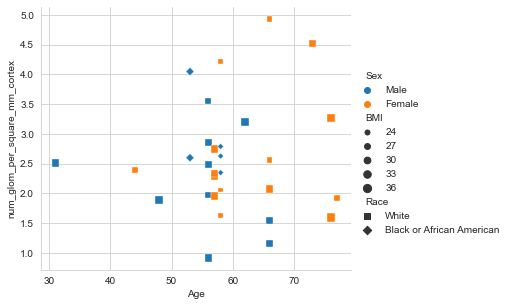

In [31]:
import seaborn as sns
sns.set_style("whitegrid")

#ax8 = sns.relplot(x='Age', y='num_glom_per_square_mm_cortex', data=df, hue="Sex", palette=['b', 'r'], style="Race", markers=['s', 'D'], size="BMI") # , sizes=(15, 200)
#ax8 = sns.relplot(x='Age', y='num_glom_per_square_mm_cortex', data=df, hue="Donor_ID", style="Race", markers=['s', 'D'], size="BMI") # , sizes=(15, 200)
#ax8 = sns.relplot(x='Age', y='num_glom_per_square_mm_cortex', data=df, hue="Donor_ID", col="Sex", style="Race", markers=['s', 'D'], size="BMI") # , sizes=(15, 200)
ax8 = sns.relplot(x='Age', y='num_glom_per_square_mm_cortex', data=df, hue="Sex", style="Race", markers=['s', 'D'], size="BMI") # , sizes=(15, 200)

#ax8.set(title="Number of Glomeruli in a mm^2 of Cortex by Age", xlabel='Age', ylabel="Approximate number of glomeruli per mm^2 cortex")
plt.subplots_adjust(top=0.88, bottom=0.15)
#plt.savefig("Number of Glomeruli in a mm^2 of Cortex by Age - by sex.png")

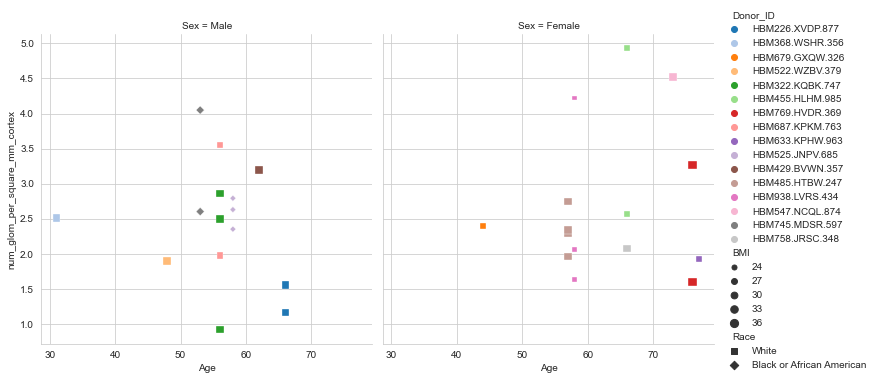

In [32]:
ax9 = sns.relplot(x='Age', y='num_glom_per_square_mm_cortex', data=df, hue="Donor_ID", col="Sex", palette="tab20", style="Race", markers=['s', 'D'], size="BMI") # , sizes=(15, 200)
plt.savefig("Number of Glomeruli in a mm^2 of Cortex by Age - by sex - tab20 palette.png")

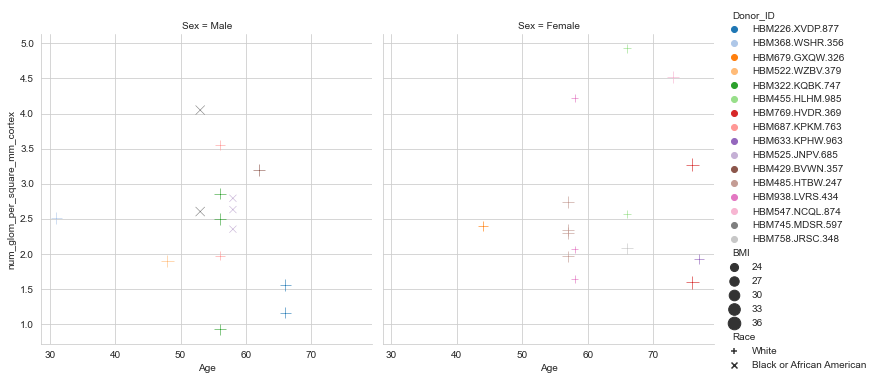

In [57]:
ax9 = sns.relplot(x='Age', y='num_glom_per_square_mm_cortex', data=df, hue="Donor_ID", col="Sex", palette="tab20", style="Race", markers=['+', 'x'], size="BMI", sizes=(50, 170))
plt.savefig("Number of Glomeruli in a mm^2 of Cortex by Age - by sex - tab20 palette - no fill.png")

In [33]:
df.to_csv("Metadata all 30 with approx glom density.csv", index=False)

# Crypt Annotations

In [34]:
crypt_mask_filenames = os.listdir("Path to colonic crypt json")
print(crypt_mask_filenames)
len(crypt_mask_filenames)

['CL_HandE_1234_B004_annotations.json', 'HandE_B005_CL_b_RGB_annotations.json']


2

In [35]:
colon_image_shapes = [(9408, 9072), (9408, 9072)]

In [36]:
avg_area_per_image = []
for file in crypt_mask_filenames:
    json_filepath = "Path to colonic crypt json/"+file
    jsonFile = open(json_filepath, 'r')
    colon_data = json.load(jsonFile)
    jsonFile.close()
    crypt_polys = []
    for i in range(len(colon_data)):   
        crypt_polys.append(Polygon(colon_data[i]['geometry']['coordinates'][0]))
    crypt_areas = []
    for j in range(len(crypt_polys)):
        crypt_areas.append(crypt_polys[j].area)
    average_crypt_area = sum(crypt_areas)/len(crypt_areas)
    avg_area_per_image.append(average_crypt_area)

In [37]:
print("Crypt mask file names and their average area per crypt annotation in pixels.")
for k in range(len(crypt_mask_filenames)):
    print(crypt_mask_filenames[k]+",", np.around(avg_area_per_image[k], decimals = 1))

Crypt mask file names and their average area per crypt annotation in pixels.
CL_HandE_1234_B004_annotations.json, 23358.9
HandE_B005_CL_b_RGB_annotations.json, 19303.7


Now, I need to convert the glom. and crypt areas from pixels to microns^2.

Convert from pixels to square microns.

In [38]:
print("Crypt mask file names and their average area per crypt annotation in square micron.")
for k in range(len(crypt_mask_filenames)):
    print(crypt_mask_filenames[k]+",", np.around(avg_area_per_image[k]*754.884/1000000, decimals = 1))

Crypt mask file names and their average area per crypt annotation in square micron.
CL_HandE_1234_B004_annotations.json, 17.6
HandE_B005_CL_b_RGB_annotations.json, 14.6


In [39]:
print("Avg. crypt area in pixels", (avg_area_per_image[0]+avg_area_per_image[1])/2)
print("Avg. crypt area in square micron", (avg_area_per_image[0]+avg_area_per_image[1])/2*754.884/1000000)

Avg. crypt area in pixels 21331.257755453677
Avg. crypt area in square micron 16.102625179467893
